This script analyzes the burst statistics calculated by the "calculate_event_properties" function used for the NERC (see "NERC_data_complexity.ipynb") data

### Imports/Dependencies

In [3]:
import numpy as np
import pandas as pd
import glob
import os

import datetime
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import seaborn as sns



In [4]:

# Function to compute histogram
def compute_histogram_bootstrap(data,bin_edges,num_bootstrap_samples):
    histogram, _ = np.histogram(data, bins=bin_edges)#, density=True)
    
    # Perform bootstrap resampling
    bootstrap_histograms = []
    for _ in range(num_bootstrap_samples):
        bootstrap_sample = np.random.choice(values, size=int(np.floor(len(values)/2)), replace=True)
#         histogram, _ = compute_histogram(bootstrap_sample,bin_edges)
        histogram, _ = np.histogram(bootstrap_sample,bin_edges)
        bootstrap_histograms.append(histogram)

    # Compute uncertainty estimates
    mean_histogram = np.mean(bootstrap_histograms, axis=0)
    std_histogram = np.std(bootstrap_histograms, axis=0)


    return bootstrap_histograms, mean_histogram, std_histogram



### Read in the data

In [6]:
nerc_data_directory = '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/integrated_data/'
files_nerc = glob.glob( os.path.join(nerc_data_directory,'*.csv') )
files_nerc

['/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/integrated_data/integrated_data_event_20150919.csv',
 '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/integrated_data/integrated_data_event_20150317.csv',
 '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/integrated_data/integrated_data_event_20151220.csv',
 '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/integrated_data/integrated_data_event_20240419.csv',
 '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/integrated_data/integrated_data_event_20130531.csv',
 '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/integrated_data/integrated_data_event_20210512.csv',
 '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/integrated_data/integrated_data_event_20131002.csv',
 '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/integrated_data/integrated_data_event_20170927.csv',
 '/Users/ryanmc/Documents/Conferences/Ja

In [7]:
thresholds = [0.5,1.5,2.5,3.5]
for th in thresholds:
    
    dir_base = '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/burst_event_data/NERC/'+str(th)+'/positive'
    print('\n\n\n WORKING ON POSITIVE NERC EVENTS')

    start_flag = 0

    for f in files_nerc:
        print('working on event = {}'.format(f[f.find('event'):-4]))
        # get event stub
        ev = f[f.find('event'):-4]

        # AE stats
        df_AE_tmp = pd.read_csv( os.path.join(dir_base,ev+'AEevents.csv'),index_col=0)
        df_SME_tmp = pd.read_csv( os.path.join(dir_base,ev+'SMEevents.csv'),index_col=0)

        # IMF stats
        df_IMF_tmp = pd.read_csv( os.path.join(dir_base,ev+'IMFevents.csv'),index_col=0)

        # GIC stats
        df_GIC_tmp = pd.read_csv( os.path.join(dir_base,ev+'GICevents.csv'),index_col=0)

        if start_flag == 0:
            df_AE_total_NERC_positive = df_AE_tmp
            df_SME_total_NERC_positive = df_SME_tmp
            df_IMF_total_NERC_positive = df_IMF_tmp
            df_GIC_total_NERC_positive = df_GIC_tmp
            start_flag = 1
        else:

            df_AE_total_NERC_positive = pd.concat([df_AE_total_NERC_positive, df_AE_tmp], axis=0)
            df_SME_total_NERC_positive = pd.concat([df_SME_total_NERC_positive, df_SME_tmp], axis=0)
            df_IMF_total_NERC_positive = pd.concat([df_IMF_total_NERC_positive, df_IMF_tmp], axis=0)
            df_GIC_total_NERC_positive = pd.concat([df_GIC_total_NERC_positive, df_GIC_tmp], axis=0)

    if th == 0.5:
        df_GIC_total_NERC_positive_0p5 = df_GIC_total_NERC_positive
    elif th == 1.5:
        df_GIC_total_NERC_positive_1p5 = df_GIC_total_NERC_positive
    elif th == 2.5:
        df_GIC_total_NERC_positive_2p5 = df_GIC_total_NERC_positive
    elif th == 3.5:
        df_GIC_total_NERC_positive_3p5 = df_GIC_total_NERC_positive


    dir_base = '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/burst_event_data/NERC/'+str(th)+'/negative'
    print('\n\n\n WORKING ON NEGATIVE NERC EVENTS')
    start_flag = 0

    for f in files_nerc:
        print('working on event = {}'.format(f[f.find('event'):-4]))
        # get event stub
        ev = f[f.find('event'):-4]

        # AE stats
        df_AE_tmp = pd.read_csv( os.path.join(dir_base,ev+'AEevents.csv'),index_col=0)
        df_SME_tmp = pd.read_csv( os.path.join(dir_base,ev+'SMEevents.csv'),index_col=0)

        # IMF stats
        df_IMF_tmp = pd.read_csv( os.path.join(dir_base,ev+'IMFevents.csv'),index_col=0)

        # GIC stats
        df_GIC_tmp = pd.read_csv( os.path.join(dir_base,ev+'GICevents.csv'),index_col=0)

        if start_flag == 0:
            df_AE_total_NERC_negative = df_AE_tmp
            df_SME_total_NERC_negative = df_SME_tmp
            df_IMF_total_NERC_negative = df_IMF_tmp
            df_GIC_total_NERC_negative = df_GIC_tmp
            start_flag = 1
        else:

            df_AE_total_NERC_negative = pd.concat([df_AE_total_NERC_negative, df_AE_tmp], axis=0)
            df_SME_total_NERC_negative = pd.concat([df_SME_total_NERC_negative, df_SME_tmp], axis=0)
            df_IMF_total_NERC_negative = pd.concat([df_IMF_total_NERC_negative, df_IMF_tmp], axis=0)
            df_GIC_total_NERC_negative = pd.concat([df_GIC_total_NERC_negative, df_GIC_tmp], axis=0)
    
    if th == 0.5:
        df_GIC_total_NERC_negative_0p5 = df_GIC_total_NERC_negative
    elif th == 1.5:
        df_GIC_total_NERC_negative_1p5 = df_GIC_total_NERC_negative
    elif th == 2.5:
        df_GIC_total_NERC_negative_2p5 = df_GIC_total_NERC_negative
    elif th == 3.5:
        df_GIC_total_NERC_negative_3p5 = df_GIC_total_NERC_negative






 WORKING ON POSITIVE NERC EVENTS
working on event = event_20150919
working on event = event_20150317
working on event = event_20151220
working on event = event_20240419
working on event = event_20130531
working on event = event_20210512
working on event = event_20131002
working on event = event_20170927
working on event = event_20240323
working on event = event_20230423
working on event = event_20150622
working on event = event_20240502
working on event = event_20230226
working on event = event_20170527
working on event = event_20180825
working on event = event_20170907
working on event = event_20220409
working on event = event_20240510
working on event = event_20151006
working on event = event_20240628
working on event = event_20150911
working on event = event_20231201
working on event = event_20230323



 WORKING ON NEGATIVE NERC EVENTS
working on event = event_20150919
working on event = event_20150317
working on event = event_20151220
working on event = event_20240419
working on

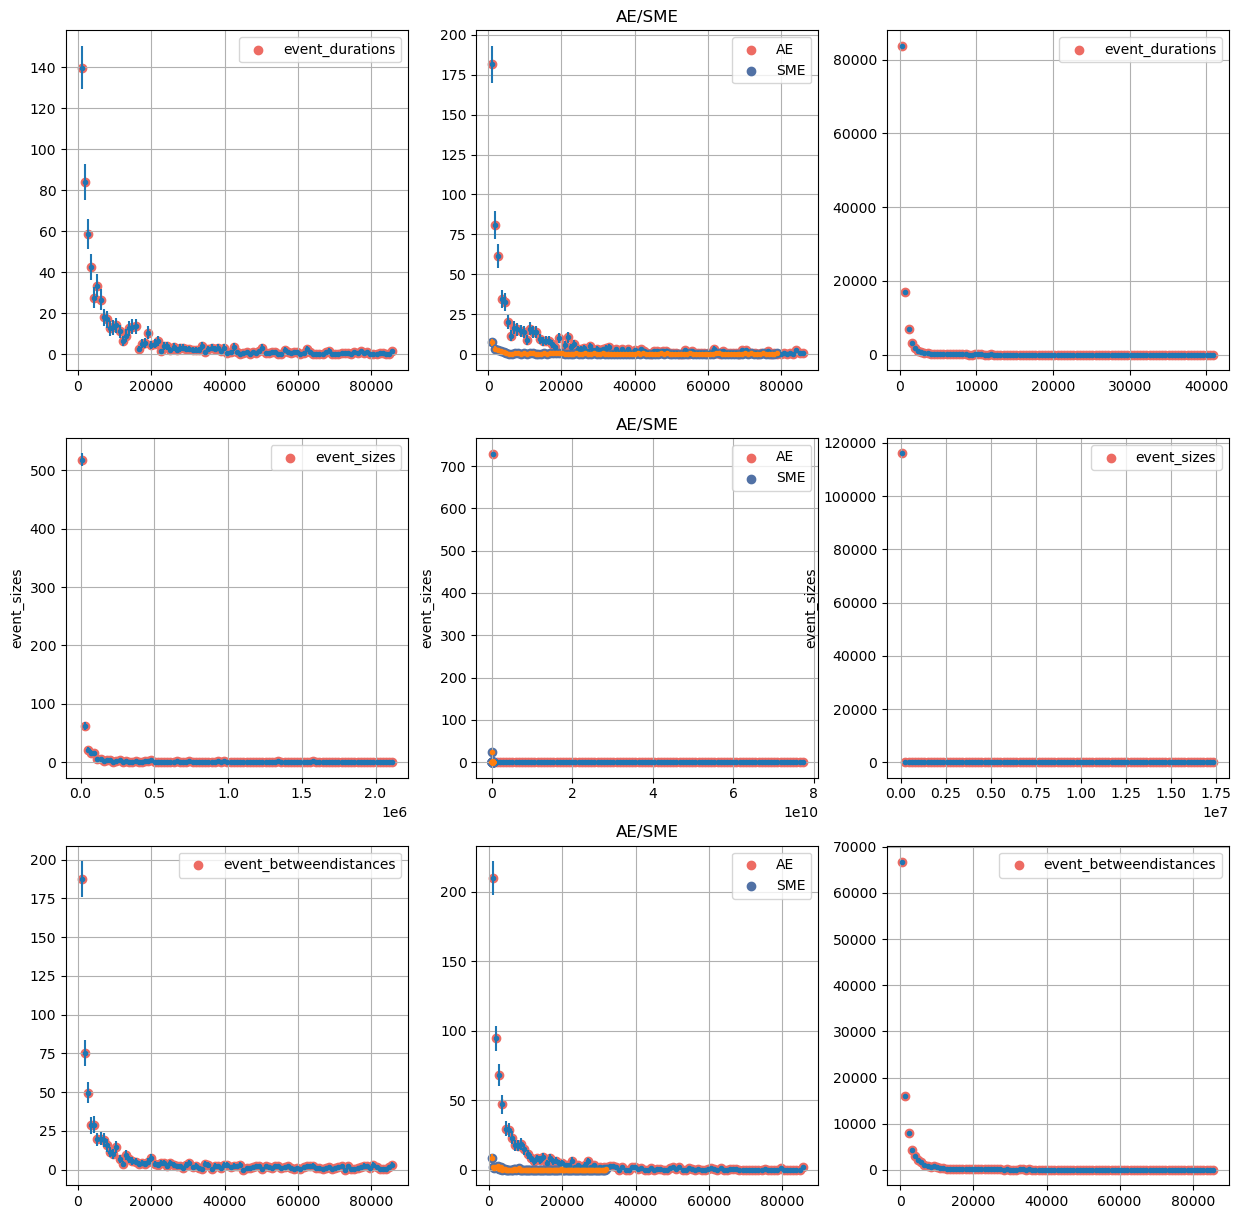

In [27]:
# Number of bootstrap samples
num_bootstrap_samples = 10000

# Create a 3x3 grid of subplots using gridspec
fig = plt.figure(figsize=(15,15))
gs = gridspec.GridSpec(3, 3, )#height_ratios=[1, 1, 1])
c_plot = '#ED6B63'
c_plot2 = '#5171A5'

row_labels=['event durations','event sizes','event return times']
column_labels=['IMF','AE/SME','GIC']

# Plot PDFs in each subplot
for i, var_label in enumerate(['IMF','AE/SME','GIC']):
    if var_label == 'IMF':
        data_plot = df_IMF_total_NERC_positive
    if var_label == 'AE/SME':
        data_plot = df_AE_total_NERC_positive
        data_plot2 = df_SME_total_NERC_positive
    if var_label == 'GIC':
        data_plot = df_GIC_total_NERC_positive_1p5
    
    for j, data_label in enumerate(['event_durations','event_sizes','event_betweendistances']):
#         values = data_plot[data_label].values
#         values = values[~np.isnan(values)]
        values = data_plot[data_label][~data_plot[data_label].isna()].values

        # Define bin edges
        bin_edges = np.linspace(min(values),max(values), 100)

        # compute histogram bootstrap estimates
        bootstrap_histograms, mean_histogram, std_histogram = compute_histogram_bootstrap(values,bin_edges,num_bootstrap_samples)

        ax = plt.subplot(gs[j,i])
        
        if var_label == 'AE/SME':
        
            plt.scatter(bin_edges[:-1] + np.diff(bin_edges) / 2, mean_histogram, marker='o', color=c_plot, label='AE')
            plt.errorbar(bin_edges[:-1] + np.diff(bin_edges) / 2, mean_histogram,yerr=std_histogram, fmt=".")
        
#             values = data_plot2[data_label].values
#             values = values[~np.isnan(values)]
            values = data_plot2[data_label][~data_plot2[data_label].isna()].values



            # Define bin edges
            bin_edges = np.linspace(min(values),max(values), 100)

            # compute histogram bootstrap estimates
            bootstrap_histograms, mean_histogram, std_histogram = compute_histogram_bootstrap(values,bin_edges,num_bootstrap_samples)

            plt.scatter(bin_edges[:-1] + np.diff(bin_edges) / 2, mean_histogram, marker='o', color=c_plot2, label='SME')
            plt.errorbar(bin_edges[:-1] + np.diff(bin_edges) / 2, mean_histogram,yerr=std_histogram, fmt=".")
        
        else: 
            plt.scatter(bin_edges[:-1] + np.diff(bin_edges) / 2, mean_histogram, marker='o', color=c_plot, label=var_label)
            plt.errorbar(bin_edges[:-1] + np.diff(bin_edges) / 2, mean_histogram,yerr=std_histogram, fmt=".")
        
        
#         ax.set_xscale('log')
#         ax.set_yscale('log')
        if (i==0):
            ax.set_title(var_label)
        if (j==0):
            ax.set_ylabel(data_label)

        ax.grid(True)
        ax.legend()
    #     plt.show()
    


